In [1]:
# Data Handling and Manipulation 
import pandas as pd  
import numpy as np  
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns  
from wordcloud import WordCloud  
# NLP
import spacy  # For advanced natural language processing tasks, including tokenization, parsing, and named entity recognition
from textblob import TextBlob  # For simple NLP tasks like sentiment analysis and text processing

# Importing Utility 
from collections import Counter  # For counting hashable objects, particularly useful for counting word frequencies

In [2]:
df=pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/processed_reviews_second.csv')
df.head()

,listing_id,id,date,reviewer_id,comments,Year,Lang,host_name,neighbourhood_cleansed,room_type,...,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Number of Sentences,Number of Words,Number of Characters,Host,Host freq
0,15420,755523548,2021-06-05,187504576,fantastic apartment beautifully furnish throug...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,3,50,324,False,0
1,15420,761386255,2021-05-23,119596131,"amaze place . justice ! spotlessly clean , hug...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,6,54,332,True,2
2,15420,770467244,2021-06-14,111721539,book apartment surprise birthday visit host to...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,6,78,450,True,3
3,15420,396926559045081909,2021-01-07,41684971,"stayed place many time . comfortable , clean p...",2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,3,33,206,True,2
4,15420,398989660111676009,2021-04-07,357578834,fabulous apartment brilliant location thoughtf...,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,...,3,545,3.4,1,58,2,19,112,True,1


In [3]:
# Identifying and display float values in the 'comments' column
float_values = df['comments'].apply(lambda x: isinstance(x, float))

# Filtering the DataFrame to isolate rows where 'comments' contain float values
float_comments = df[float_values]
print("Rows with float values in 'comments':")
print(float_comments)

Rows with float values in 'comments':
       listing_id                  id        date  reviewer_id comments  Year  \
15595     4862112  441072924391011701  2021-08-31    253639622      NaN  2021   
33688    12929512  873821930911267554  2023-04-20     64335485      NaN  2023   
45864    17550951  889762357368440890  2023-12-05     25882066      NaN  2023   
56987    20355772  815072086378405827  2023-01-29    304479055      NaN  2023   

      Lang host_name                   neighbourhood_cleansed  \
15595   en   host_82                                Tollcross   
33688   en    host_0               New Town East and Gayfield   
45864   en  host_174                 North Leith and Newhaven   
56987   en  host_453  Blackford, West Mains and Mayfield Road   

             room_type  ... minimum_nights  number_of_reviews  \
15595  Entire home/apt  ...              2                 97   
33688     Private room  ...              2                285   
45864  Entire home/apt  ...        

In [4]:
# Load a pre-trained NLP model from spaCy. The 'en_core_web_sm' model is a small English model that includes vocabulary, syntax, and entities.
nlp = spacy.load('en_core_web_sm')

# Function to extract noun phrases (aspects) from text
def extract_aspects(text):
    # Check if the text is not a string, and handle accordingly
    if not isinstance(text, str):
        return []
    
    # Process the text with spaCy to parse it and generate a Doc object
    doc = nlp(text)
    
    # Extract and return noun phrases
    aspects = [chunk.text for chunk in doc.noun_chunks]
    return aspects

# Applying aspect extraction to each comment in the dataset
df['aspects'] = df['comments'].apply(extract_aspects)

# Flatten the list of aspects into a single list of aspects and count their frequencies
all_aspects = [aspect for sublist in df['aspects'].tolist() for aspect in sublist]
aspect_freq = Counter(all_aspects)

# Displaying the most common aspects
most_common_aspects = aspect_freq.most_common(20)
for aspect, freq in most_common_aspects:
    print(f"Aspect: {aspect}, Frequency: {freq}")

Aspect: host, Frequency: 33818
Aspect: you, Frequency: 30680
Aspect: everything, Frequency: 27484
Aspect: apartment, Frequency: 17266
Aspect: place, Frequency: 16524
Aspect: great location, Frequency: 8217
Aspect: location, Frequency: 6995
Aspect: anyone, Frequency: 3828
Aspect: great place, Frequency: 3766
Aspect: walk distance, Frequency: 3278
Aspect: room, Frequency: 3174
Aspect: great host, Frequency: 3087
Aspect: city, Frequency: 3079
Aspect: home, Frequency: 2490
Aspect: lovely apartment, Frequency: 2230
Aspect: thanks, Frequency: 2189
Aspect: kitchen, Frequency: 2106
Aspect: bed, Frequency: 1958
Aspect: perfect location, Frequency: 1906
Aspect: house, Frequency: 1863


In [6]:
# Displaying more aspects
most_common_aspects = aspect_freq.most_common(50)
for aspect, freq in most_common_aspects:
    print(f"Aspect: {aspect}, Frequency: {freq}")

Aspect: host, Frequency: 33818
Aspect: you, Frequency: 30680
Aspect: everything, Frequency: 27484
Aspect: apartment, Frequency: 17266
Aspect: place, Frequency: 16524
Aspect: great location, Frequency: 8217
Aspect: location, Frequency: 6995
Aspect: anyone, Frequency: 3828
Aspect: great place, Frequency: 3766
Aspect: walk distance, Frequency: 3278
Aspect: room, Frequency: 3174
Aspect: great host, Frequency: 3087
Aspect: city, Frequency: 3079
Aspect: home, Frequency: 2490
Aspect: lovely apartment, Frequency: 2230
Aspect: thanks, Frequency: 2189
Aspect: kitchen, Frequency: 2106
Aspect: bed, Frequency: 1958
Aspect: perfect location, Frequency: 1906
Aspect: house, Frequency: 1863
Aspect: great apartment, Frequency: 1741
Aspect: anything, Frequency: 1720
Aspect: communication, Frequency: 1709
Aspect: royal mile, Frequency: 1681
Aspect: bus, Frequency: 1656
Aspect: property, Frequency: 1616
Aspect: lovely place, Frequency: 1453
Aspect: host great host, Frequency: 1403
Aspect: host host, Freque

In [7]:
# Dropping rows where the 'comments' column is empty if any
df = df.dropna(subset=['comments'])

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis to each review
df['sentiment'] = df['comments'].apply(get_sentiment)

In [9]:
# Filtering aspects based on the frequency threshold of 8
filtered_aspects = [aspect for aspect, freq in aspect_freq.items() if freq >= 8]

In [10]:
# Dictionary to store the average sentiment for each filtered aspect
aspect_sentiment = {}

# Calculating the average sentiment for each filtered aspect
for aspect in filtered_aspects:
    # Finding all reviews that mention this aspect
    relevant_reviews = df[df['aspects'].apply(lambda x: aspect in x)]
    # Calculating the mean sentiment for these reviews
    aspect_sentiment[aspect] = relevant_reviews['sentiment'].mean()

# Converting the dictionary to a dataframe for easier analysis
aspect_sentiment_df = pd.DataFrame(list(aspect_sentiment.items()), columns=['Aspect', 'Average Sentiment'])

# Sorting the DataFrame by sentiment score
aspect_sentiment_df = aspect_sentiment_df.sort_values(by='Average Sentiment', ascending=False)

# Displaying the results
print("Top 10 Aspects with Positive Sentiment:")
print(aspect_sentiment_df.head(10))  # For positive aspects

print("\nTop 10 Aspects with Negative Sentiment:")
print(aspect_sentiment_df.tail(10))  # For negative aspects

Top 10 Aspects with Positive Sentiment:
                                    Aspect  Average Sentiment
3564  wonderful apartment perfect location           0.712536
5728              great brilliant location           0.657271
756                  perfect communication           0.648907
4636  excellent apartment perfect location           0.641592
4191             absolutely perfect family           0.629613
823     wonderful apartment great location           0.629199
4205         great property great location           0.625110
4800             absolutely beautiful home           0.621819
2651              host wonderful apartment           0.613804
4826            great apartment great host           0.613150

Top 10 Aspects with Negative Sentiment:
                   Aspect  Average Sentiment
1811                waste           0.076415
5828          black mould           0.075180
2206        positive note           0.052239
598          compensation           0.051543
2905        

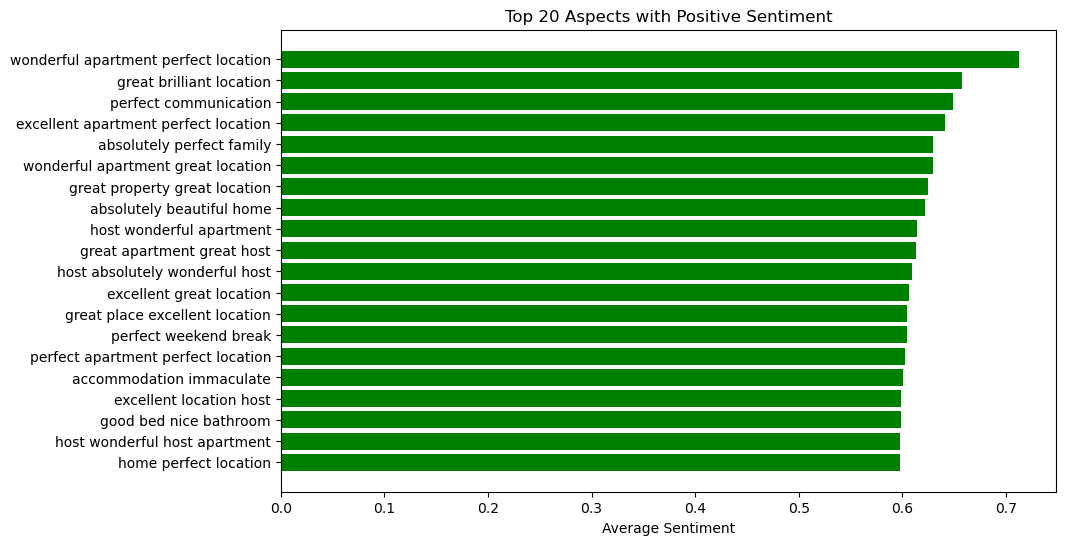

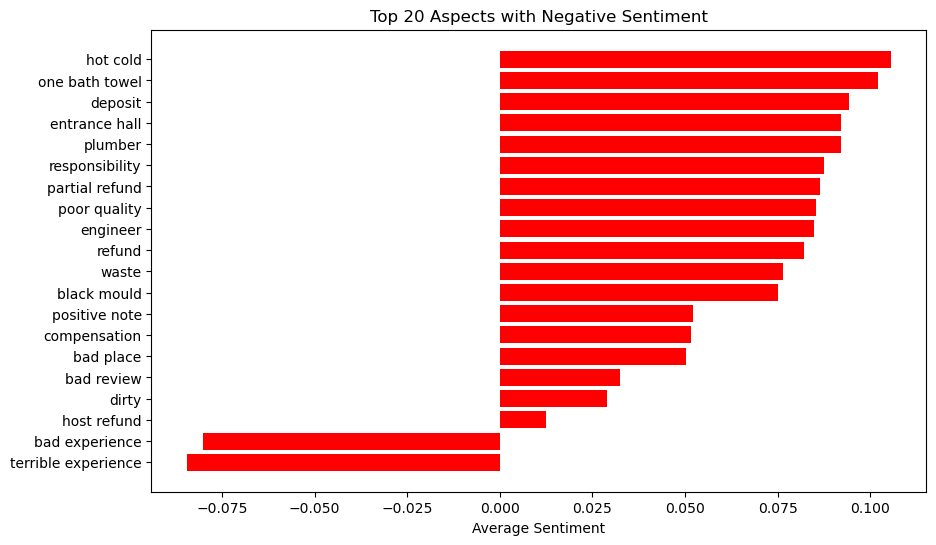

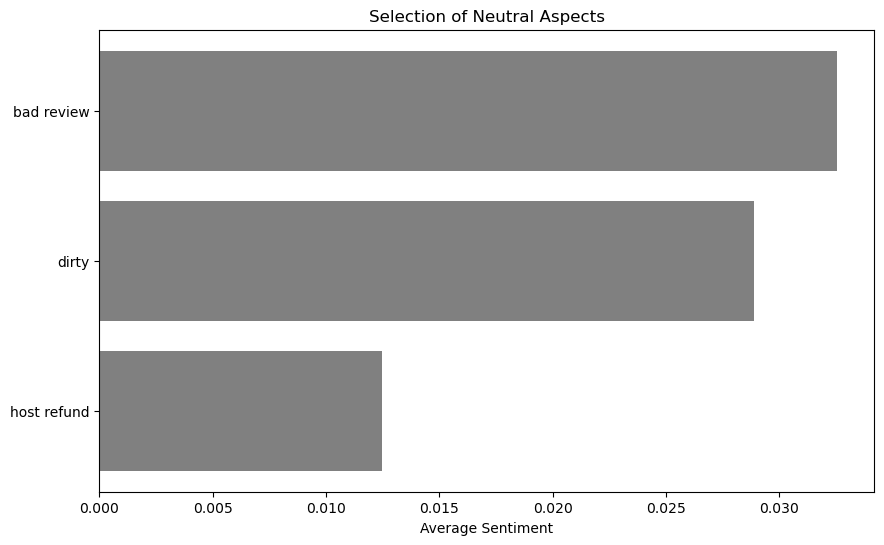

In [20]:
# Visualize the Top 10 Positive Sentiment Aspects
plt.figure(figsize=(10, 6))
plt.barh(aspect_sentiment_df['Aspect'].head(20), aspect_sentiment_df['Average Sentiment'].head(20), color='green')
plt.xlabel('Average Sentiment')
plt.title('Top 20 Aspects with Positive Sentiment')
plt.gca().invert_yaxis()  # Highest sentiment at the top
plt.show()

# Visualize the Top 10 Negative Sentiment Aspects
plt.figure(figsize=(10, 6))
plt.barh(aspect_sentiment_df['Aspect'].tail(20), aspect_sentiment_df['Average Sentiment'].tail(20), color='red')
plt.xlabel('Average Sentiment')
plt.title('Top 20 Aspects with Negative Sentiment')
plt.gca().invert_yaxis()  # Most negative sentiment at the top
plt.show()

# Visualize a Selection of Neutral Sentiment Aspects
# Neutral aspects are those with sentiment close to 0, so we filter them
neutral_threshold = 0.05  # You can adjust this threshold
neutral_aspects = aspect_sentiment_df[
    (aspect_sentiment_df['Average Sentiment'] > -neutral_threshold) & 
    (aspect_sentiment_df['Average Sentiment'] < neutral_threshold)
].head(10)

plt.figure(figsize=(10, 6))
plt.barh(neutral_aspects['Aspect'], neutral_aspects['Average Sentiment'], color='gray')
plt.xlabel('Average Sentiment')
plt.title('Selection of Neutral Aspects')
plt.gca().invert_yaxis()  # Neutral aspects at the top
plt.show()

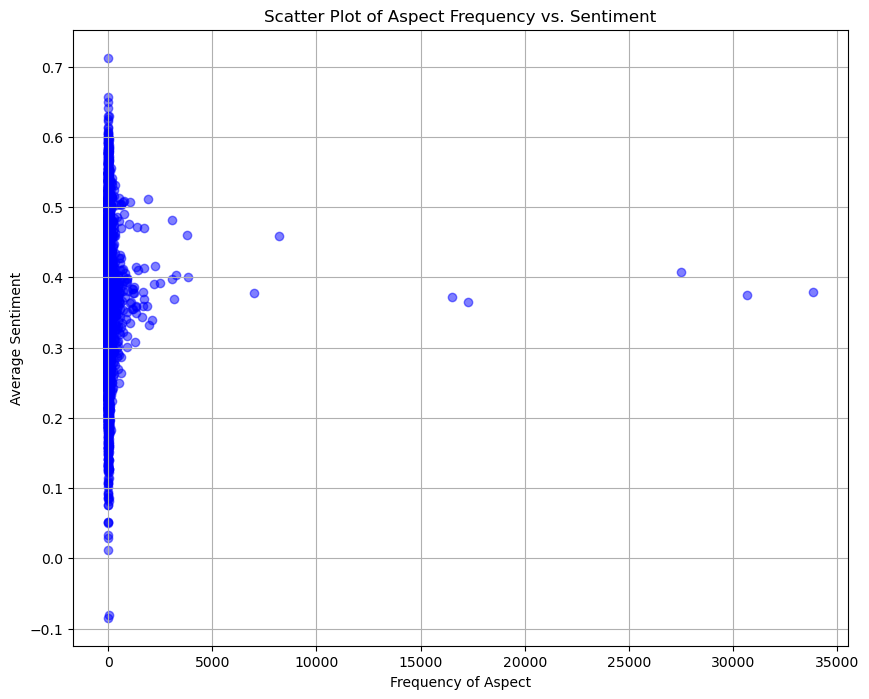

In [15]:
# Creating a dataframe that includes the frequency of each aspect
aspect_sentiment_df['Frequency'] = aspect_sentiment_df['Aspect'].map(aspect_freq)

# Plotting the scatter plot. This plot can show the relationship between the frequency of an aspect and its average sentiment. 
# It helps to identify whether frequently mentioned aspects tend to be more positive or negative.
plt.figure(figsize=(10, 8))
plt.scatter(aspect_sentiment_df['Frequency'], aspect_sentiment_df['Average Sentiment'], color='blue', alpha=0.5)
plt.xlabel('Frequency of Aspect')
plt.ylabel('Average Sentiment')
plt.title('Scatter Plot of Aspect Frequency vs. Sentiment')
plt.grid(True)
plt.show()

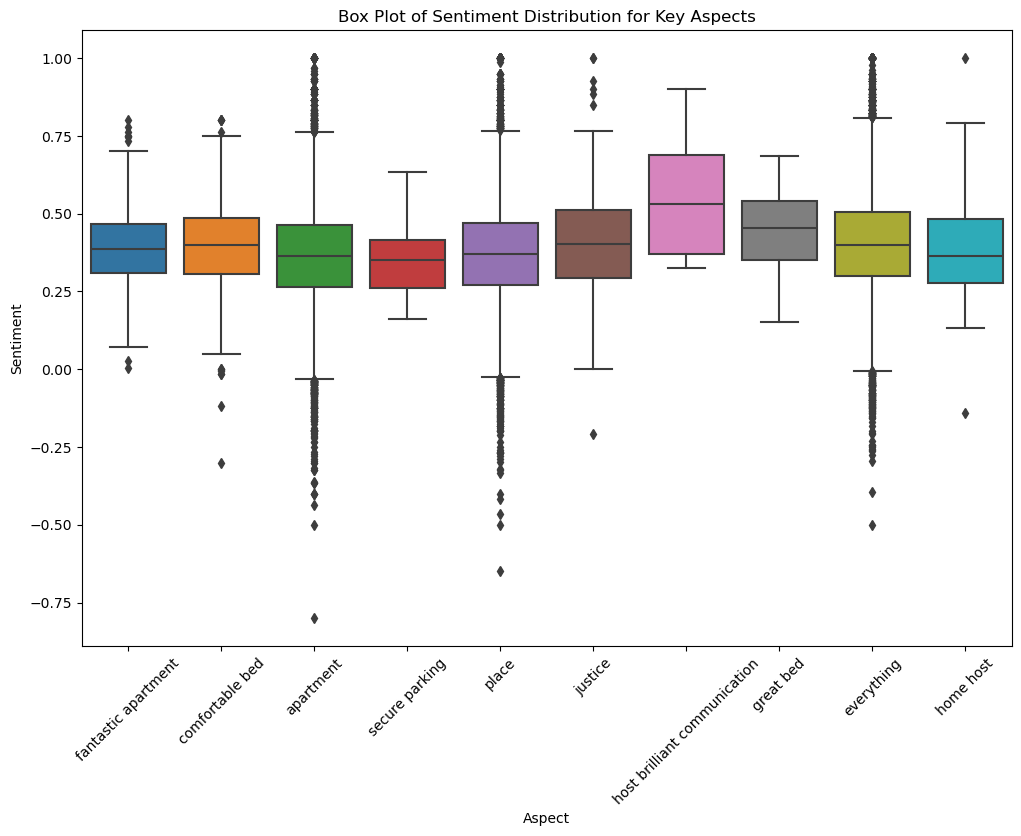

In [16]:
# Preparing data for box plot
boxplot_data = []
for aspect in filtered_aspects:
    aspect_data = df[df['aspects'].apply(lambda x: aspect in x)]['sentiment']
    boxplot_data.append(aspect_data)

# Plot the box plot for top 10 most frequent aspects. A box plot shows the distribution of sentiment scores for the top aspects, giving insights into the variability in sentiment.
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data[:10])
plt.xticks(ticks=range(10), labels=filtered_aspects[:10], rotation=45)
plt.xlabel('Aspect')
plt.ylabel('Sentiment')
plt.title('Box Plot of Sentiment Distribution for Key Aspects')
plt.show()

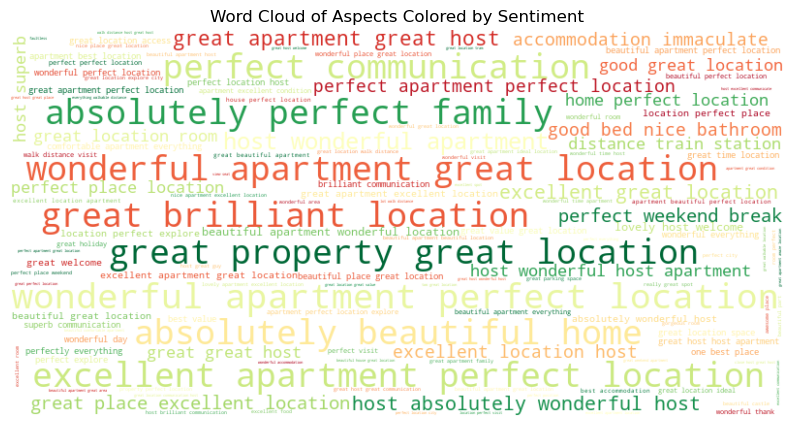

In [13]:
# Creating a dictionary of aspects and their sentiments
aspect_sentiment_dict = dict(zip(aspect_sentiment_df['Aspect'], aspect_sentiment_df['Average Sentiment']))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlGn', max_words=200).generate_from_frequencies(aspect_sentiment_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Aspects Colored by Sentiment')
plt.show()

In [23]:
df.to_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/text_analysis.csv', index=False)

print('Final DataFrame has been save to data folder')

Final DataFrame has been save to data folder
